# Imports



In [42]:
# imports

import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 
import numpy as np

# Carregando o dataset #


In [11]:
# carregando o dataset #
dataset = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


# Analisando os dados

In [4]:
len(imagens_treino)

60000

In [5]:
len(imagens_teste)

10000

In [30]:
imagens_treino.shape

(60000, 28, 28)

In [7]:
imagens_teste.shape

(10000, 28, 28)

In [29]:
len(identificacoes_treino)

60000

In [13]:
len(identificacoes_teste)

10000

In [17]:
identificacoes_teste.min()

0

In [18]:
identificacoes_teste.max()

9

In [19]:
total_de_classificacoes = 10

In [21]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Exibindo os dados

Text(0.5, 1.0, '9')

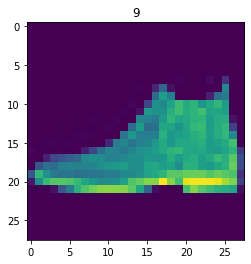

In [16]:
plt.imshow(imagens_teste[0])
plt.title(identificacoes_teste[0]) 

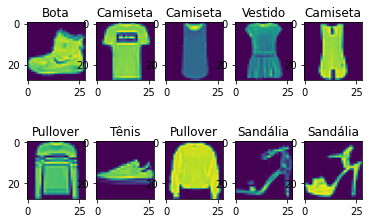

In [23]:
for imagem in range(total_de_classificacoes):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

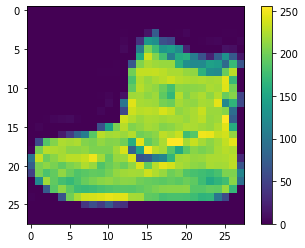

In [31]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [32]:
imagens_treino = imagens_treino/float(255)

In [75]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  # keras.layers.Dense(128, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  # keras.layers.Dense(64, activation=tensorflow.nn.relu),
  # keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [76]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5263 - accuracy: 0.8135 - val_loss: 0.4096 - val_accuracy: 0.8524
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3993 - accuracy: 0.8546 - val_loss: 0.3836 - val_accuracy: 0.8610
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3645 - accuracy: 0.8654 - val_loss: 0.3613 - val_accuracy: 0.8707
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3415 - accuracy: 0.8734 - val_loss: 0.3325 - val_accuracy: 0.8772
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3245 - accuracy: 0.8795 - val_loss: 0.3330 - val_accuracy: 0.8769


In [78]:
historico.history

{'accuracy': [0.8134791851043701,
  0.854645848274231,
  0.8653958439826965,
  0.8733541369438171,
  0.8794999718666077],
 'loss': [0.5263112783432007,
  0.3993087708950043,
  0.36454081535339355,
  0.3415443003177643,
  0.3244766592979431],
 'val_accuracy': [0.8524166941642761,
  0.8610000014305115,
  0.8706666827201843,
  0.8771666884422302,
  0.8769166469573975],
 'val_loss': [0.4096396565437317,
  0.3835937976837158,
  0.361268013715744,
  0.33249256014823914,
  0.33299118280410767]}

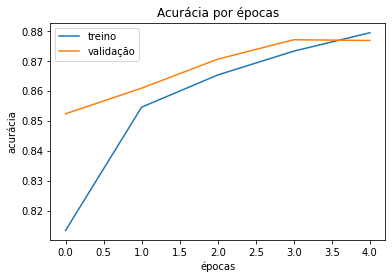

In [79]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


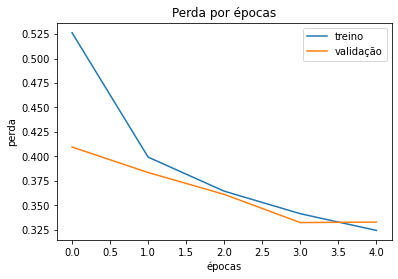

In [80]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [43]:
testes = modelo.predict(imagens_teste)


9

In [45]:
print('resultado do teste: ', np.argmax(testes[0]))
print('número da imagem de teste: ', identificacoes_teste[0])

resultado do teste:  9
número da imagem de teste:  9


In [47]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 0s 1ms/step - loss: 83.3907 - accuracy: 0.8397


In [48]:
acuracia_teste

0.8396999835968018

In [49]:
perda_teste

83.39070129394531

In [81]:
modelo.save('modelo.h5')

In [83]:
from tensorflow.keras.models import load_model

modelo_salvo = load_model('modelo.h5')

In [84]:
teste_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado do teste: ', np.argmax(teste_modelo_salvo[0]))
print('número da imagem de teste: ', identificacoes_teste[0])

resultado do teste:  9
número da imagem de teste:  9
